<a href="https://colab.research.google.com/github/RAVINA-SHAN/RAVINA-SHAN/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pyEMD

In [5]:
# Run this cell to ensure PyEMD is installed.
!pip install PyEMD soundfile

In [6]:
from PyEMD import EMD

📤 Upload your noisy voice (.wav) file


Saving WhatsApp Audio 2025-06-05 at 16.45.36_a7585db7.mp3 to WhatsApp Audio 2025-06-05 at 16.45.36_a7585db7.mp3
✅ Extracted 18 IMFs


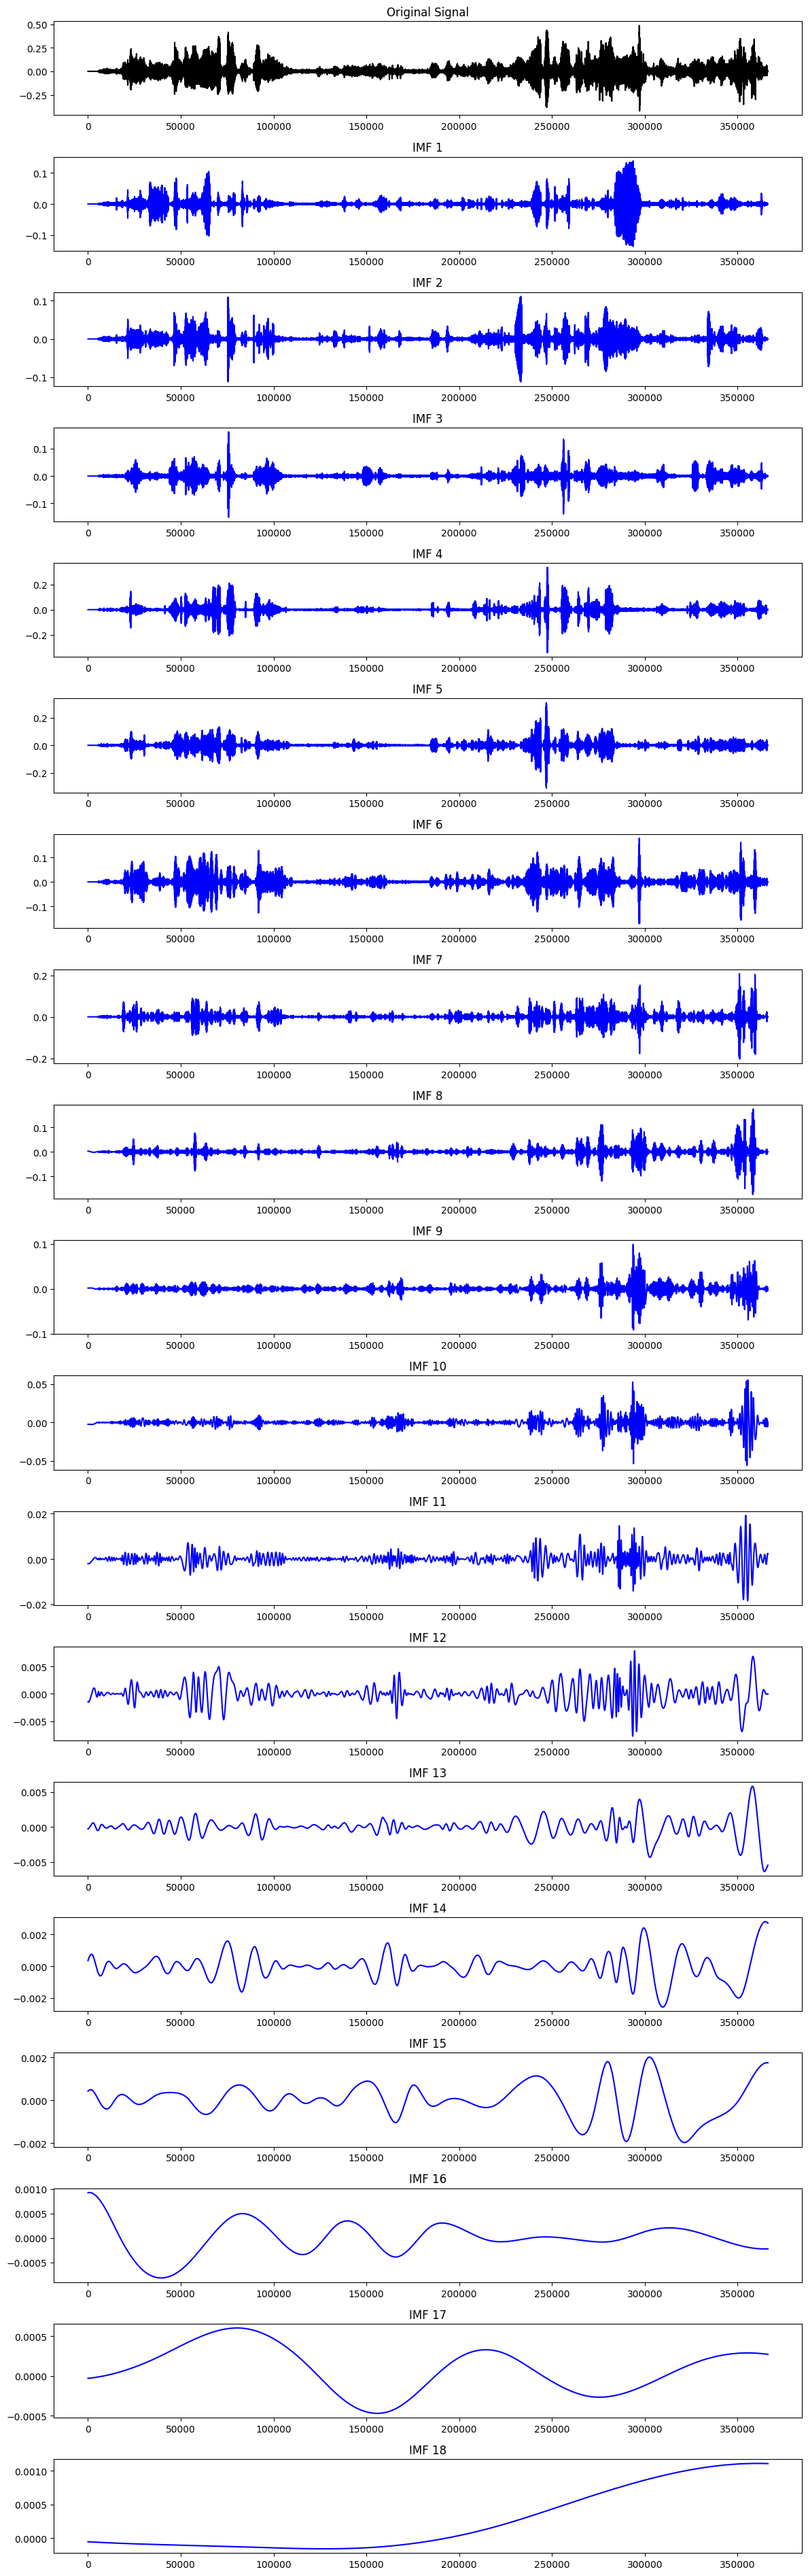

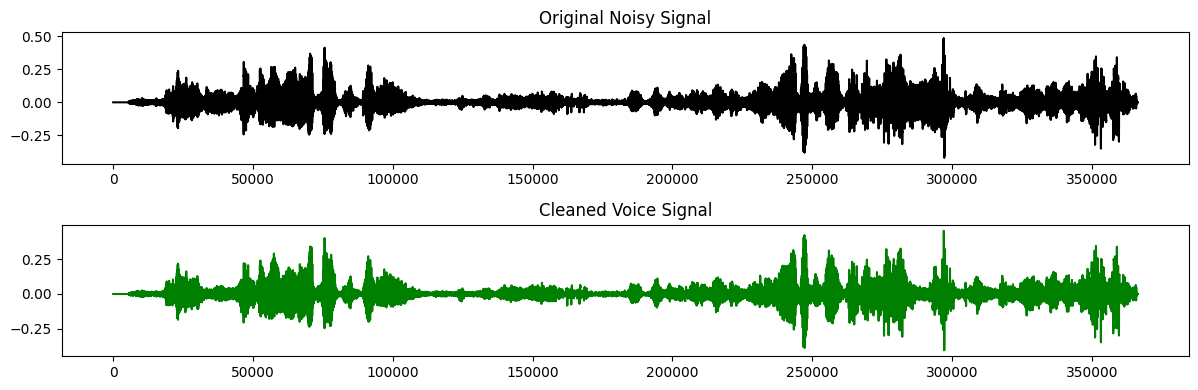

🔊 Cleaned audio (play below):



✅ Cleaned voice saved as: cleaned_voice.wav


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# ✅ Step 1: Install required libraries
!pip install PyEMD soundfile

# ✅ Step 2: Import libraries
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from PyEMD import EMD
from google.colab import files
from IPython.display import Audio, display

# ✅ Step 3: Upload your noisy voice file (e.g., noisy_voice.wav)
print("📤 Upload your noisy voice (.wav) file")
uploaded = files.upload()
audio_filename = next(iter(uploaded))

# ✅ Step 4: Load audio signal
signal, sr = sf.read(audio_filename)
if signal.ndim > 1:
    signal = signal[:, 0]  # Use one channel if stereo

# ✅ Step 5: Apply EMD to decompose the signal into IMFs
emd = EMD()
imfs = emd(signal)

print(f"✅ Extracted {len(imfs)} IMFs")

# ✅ Step 6: Plot original signal and IMFs
plt.figure(figsize=(12, 2 * (len(imfs)+1)))
plt.subplot(len(imfs)+1, 1, 1)
plt.plot(signal, color='black')
plt.title('Original Signal')
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs)+1, 1, i + 2)
    plt.plot(imf, color='blue')
    plt.title(f'IMF {i + 1}')
plt.tight_layout()
plt.show()

# ✅ Step 7: Reconstruct the signal excluding noisy IMFs (e.g., first 1 or 2 IMFs)
selected_imfs = imfs[2:]  # Drop IMF 1 & 2 to remove high-frequency noise
cleaned_signal = np.sum(selected_imfs, axis=0)

# ✅ Step 8: Compare signals
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(signal, color='black')
plt.title('Original Noisy Signal')
plt.subplot(2, 1, 2)
plt.plot(cleaned_signal, color='green')
plt.title('Cleaned Voice Signal')
plt.tight_layout()
plt.show()

# ✅ Step 9: Play the cleaned voice signal
print("🔊 Cleaned audio (play below):")
display(Audio(cleaned_signal, rate=sr))

# ✅ Step 10: Save cleaned voice to new WAV file
output_filename = 'cleaned_voice.wav'
sf.write(output_filename, cleaned_signal, sr)
print(f"\n✅ Cleaned voice saved as: {output_filename}")

# ✅ Step 11: Download the cleaned file
files.download(output_filename)
